#Keras API

Veri
*   Veri yükle
*   gerekiyor ise veriyi düzenle

Keras Api
*   model oluştur (fonksiyonel veya sequentiall)
*   modeli derle (compile)
*   modeli eğit (fit)
*   modeli değerlendir (evaluate)
*   model ile tahmin et (predictions) 




---


![alt text](https://drive.google.com/uc?id=1hCCpjBRddMlISrXJQZI46sfiIJ4HO9t7)


In [0]:

import tensorflow as tf

tf.version


<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [0]:

  # Eger tensorflow 1.x versiyonlarında colabda çalışılacak ise bu kod kullanılır
  # Anaconda da ortamı kurarken tensorflow kurulur. versiyon burada seçilmez 
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 1.x
except Exception:
  pass

import tensorflow as tf

print(tf.VERSION)
#tf.VERSION tf 1.x te çalışır 2.x te tf.version çalışır

TensorFlow 1.x selected.


1.15.2


In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


![alt text](https://drive.google.com/uc?id=1o-XASYZ0pIFipqSji94rUIwZcURtwiFI)


![alt text](https://drive.google.com/uc?id=1Q6mSKHK0rSXMztKuhZihY4llYi0rtChh)



![alt text](https://drive.google.com/uc?id=1Rq06-Y5eNzElCOKrg-Dwt5Ph_MQzuuuj)

![alt text](https://drive.google.com/uc?id=1AIkbw5nzVEm3sYhC8U69yyJ7rc1zn9rC)




In [0]:
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
print(y_train)

[5 0 4 ... 5 6 8]


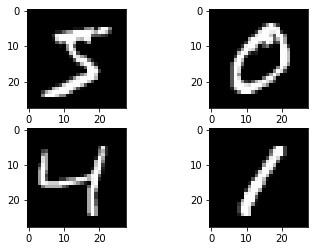

In [0]:
import matplotlib.pyplot as plt
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
 # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


In [0]:


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2525 - accuracy: 0.9268
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1109 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0766 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0560 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0432 - accuracy: 0.9863


In [0]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0769 - accuracy: 0.9759


[0.07693953812122345, 0.9758999943733215]

In [0]:
model.predict(x_test[0:2,:,:])

array([[2.49172700e-08, 9.87969262e-10, 2.37034624e-06, 2.36192951e-04,
        5.97618743e-13, 1.37409600e-07, 1.37835935e-14, 9.99760687e-01,
        2.14225029e-08, 5.60526132e-07],
       [1.38712650e-07, 3.02216480e-03, 9.95177269e-01, 1.79693883e-03,
        9.19859485e-14, 1.97081158e-06, 1.47252229e-06, 2.06008006e-11,
        1.37919230e-07, 2.48973086e-12]], dtype=float32)

In [0]:
print(y_test[0:2])

[7 2]


![alt text](https://drive.google.com/uc?id=1omvhZeDccb47_UejApO3IZySlqvfrni1)

#Keras ile çok katmanlı yapay sinir ağı

[Data set bilgi](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names)


[Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv)

In [0]:
# Sample Multilayer Perceptron Neural Network in Keras
import tensorflow as tf
import numpy
# load and prepare the dataset
dataset = numpy.loadtxt("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]


In [0]:
# 1. define the network
model = tf.keras.models.Sequential([
 
  tf.keras.layers.Dense(12,input_dim=8, activation='relu'),
  tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

# 1. define the network
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(12, input_dim=8, activation='relu'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 2. compile the network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. fit the network
history = model.fit(X, Y, epochs=50, batch_size=10)


Train on 768 samples
Epoch 1/50
768/768 [==============================] - 0s 593us/sample - loss: 18.8147 - accuracy: 0.3841
Epoch 2/50
768/768 [==============================] - 0s 147us/sample - loss: 5.5775 - accuracy: 0.4544
Epoch 3/50
768/768 [==============================] - 0s 145us/sample - loss: 1.7729 - accuracy: 0.5391
Epoch 4/50
768/768 [==============================] - 0s 136us/sample - loss: 1.3903 - accuracy: 0.5677
Epoch 5/50
768/768 [==============================] - 0s 142us/sample - loss: 1.2245 - accuracy: 0.5820
Epoch 6/50
768/768 [==============================] - 0s 136us/sample - loss: 1.1357 - accuracy: 0.5807
Epoch 7/50
768/768 [==============================] - 0s 135us/sample - loss: 1.0416 - accuracy: 0.6224
Epoch 8/50
768/768 [==============================] - 0s 153us/sample - loss: 0.9739 - accuracy: 0.6263
Epoch 9/50
768/768 [==============================] - 0s 145us/sample - loss: 0.9376 - accuracy: 0.6315
Epoch 10/50
768/768 [=====================

In [0]:
# 4. evaluate the network
loss, accuracy = model.evaluate(X, Y)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
# 5. make predictions
probabilities = model.predict(X)
predictions = [float(numpy.round(x)) for x in probabilities]
accuracy = numpy.mean(predictions == Y)
print("Prediction Accuracy: %.2f%%" % (accuracy*100))

768/768 [==============================] - 0s 112us/sample - loss: 0.5771 - accuracy: 0.7227

Loss: 0.58, Accuracy: 72.27%
Prediction Accuracy: 72.27%
